<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-MLP%20for%205%20class%20classifications%20based%20on%20WSN-DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid LR-MLP for 5 class classifications based on WSN-DS**

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Load and preprocess data
dataset = pd.read_csv("dataset_WSN-DS.csv")
y = dataset['Class']
X = dataset.drop(['Class'], axis=1)
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [10]:
dataset["Class"].unique()

array([0, 4, 3, 1, 2])

In [15]:
# Oversample data to handle class imbalance
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [16]:
# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Combined Model Results:
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00     67965
     Class 2       0.98      0.98      0.98      2985
     Class 3       0.98      0.99      0.99      2043
     Class 4       0.97      0.94      0.95      1309
     Class 5       0.90      1.00      0.95       631

    accuracy                           1.00     74933
   macro avg       0.97      0.98      0.97     74933
weighted avg       1.00      1.00      1.00     74933



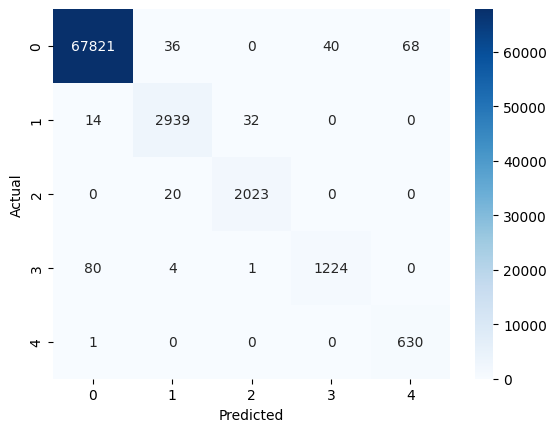

In [17]:
# Train MLP model
input_shape = X_train.shape[1]
num_classes = len(y.unique())
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# Combine LR and MLP predictions
lr_mlp_pred = np.column_stack((lr_pred, mlp_pred))
combined_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=lr_mlp_pred)

# Evaluate combined model
print("Combined Model Results:")
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
print(classification_report(y_test, combined_pred, target_names=target_names))
cm = confusion_matrix(y_test, combined_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()